## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

## 2. Data Loading

In [2]:
flights = pd.read_excel(r"Data_Train_Airline_Tickets.xlsx")
flights

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## 3. Data Exploration

In [3]:
flights.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [4]:
flights[flights['Route'].isna() | flights['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [5]:
flights.dropna(inplace=True)

In [6]:
flights.duplicated().sum()

220

In [7]:
flights[flights.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [8]:
flights.drop_duplicates(keep='first', inplace=True)
flights

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [9]:
flights.drop('Route', axis=1, inplace = True)
flights.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302


In [10]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Dep_Time         10462 non-null  object
 5   Arrival_Time     10462 non-null  object
 6   Duration         10462 non-null  object
 7   Total_Stops      10462 non-null  object
 8   Additional_Info  10462 non-null  object
 9   Price            10462 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 899.1+ KB


## 4. Data Cleansing

In [11]:
flights['journey_month'] = pd.to_datetime(flights['Date_of_Journey']).dt.month
flights['journey_day'] = pd.to_datetime(flights['Date_of_Journey']).dt.day
flights = flights.drop('Date_of_Journey', axis=1)
flights

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_day
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,No info,4145,4,27
10680,Jet Airways,Banglore,Delhi,08:20,11:20,3h,non-stop,No info,7229,4,27
10681,Vistara,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


In [12]:
# Get hour and minute of the departure
flights["departure_hour"] = pd.to_datetime(flights["Dep_Time"]).dt.hour
flights["departure_min"] = pd.to_datetime(flights["Dep_Time"]).dt.minute
flights.drop(["Dep_Time"], axis = 1, inplace = True)

In [13]:
# Get hour and minute of the Arrival
flights["arrival_hour"] = pd.to_datetime(flights.Arrival_Time).dt.hour
flights["arrival_min"] = pd.to_datetime(flights.Arrival_Time).dt.minute
flights.drop(["Arrival_Time"], axis = 1, inplace = True)

In [14]:
flights

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_day,departure_hour,departure_min,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,2h 35m,non-stop,No info,4145,4,27,20,45,23,20
10680,Jet Airways,Banglore,Delhi,3h,non-stop,No info,7229,4,27,8,20,11,20
10681,Vistara,Banglore,New Delhi,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


In [15]:
# Get the duration of flight (in Minutes)
flights['Duration'] = flights['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
flights

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_day,departure_hour,departure_min,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,170,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,150,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,155,non-stop,No info,4145,4,27,20,45,23,20
10680,Jet Airways,Banglore,Delhi,180,non-stop,No info,7229,4,27,8,20,11,20
10681,Vistara,Banglore,New Delhi,160,non-stop,No info,12648,1,3,11,30,14,10


In [16]:
flights.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [17]:
total_stops_dict = {'non-stop':0, 
                    '1 stop':1, 
                    '2 stops':2, 
                    '3 stops':3, 
                    '4 stops':4}

flights.replace( {"Total_Stops":total_stops_dict}, inplace=True)
flights

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_day,departure_hour,departure_min,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,170,0,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,445,2,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,2,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,1,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,1,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,150,0,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,155,0,No info,4145,4,27,20,45,23,20
10680,Jet Airways,Banglore,Delhi,180,0,No info,7229,4,27,8,20,11,20
10681,Vistara,Banglore,New Delhi,160,0,No info,12648,1,3,11,30,14,10


In [18]:
flights.Additional_Info.value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [19]:
flights

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_day,departure_hour,departure_min,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,170,0,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,445,2,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,2,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,1,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,1,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,150,0,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,155,0,No info,4145,4,27,20,45,23,20
10680,Jet Airways,Banglore,Delhi,180,0,No info,7229,4,27,8,20,11,20
10681,Vistara,Banglore,New Delhi,160,0,No info,12648,1,3,11,30,14,10


## 5. Exploratory Data Analysis

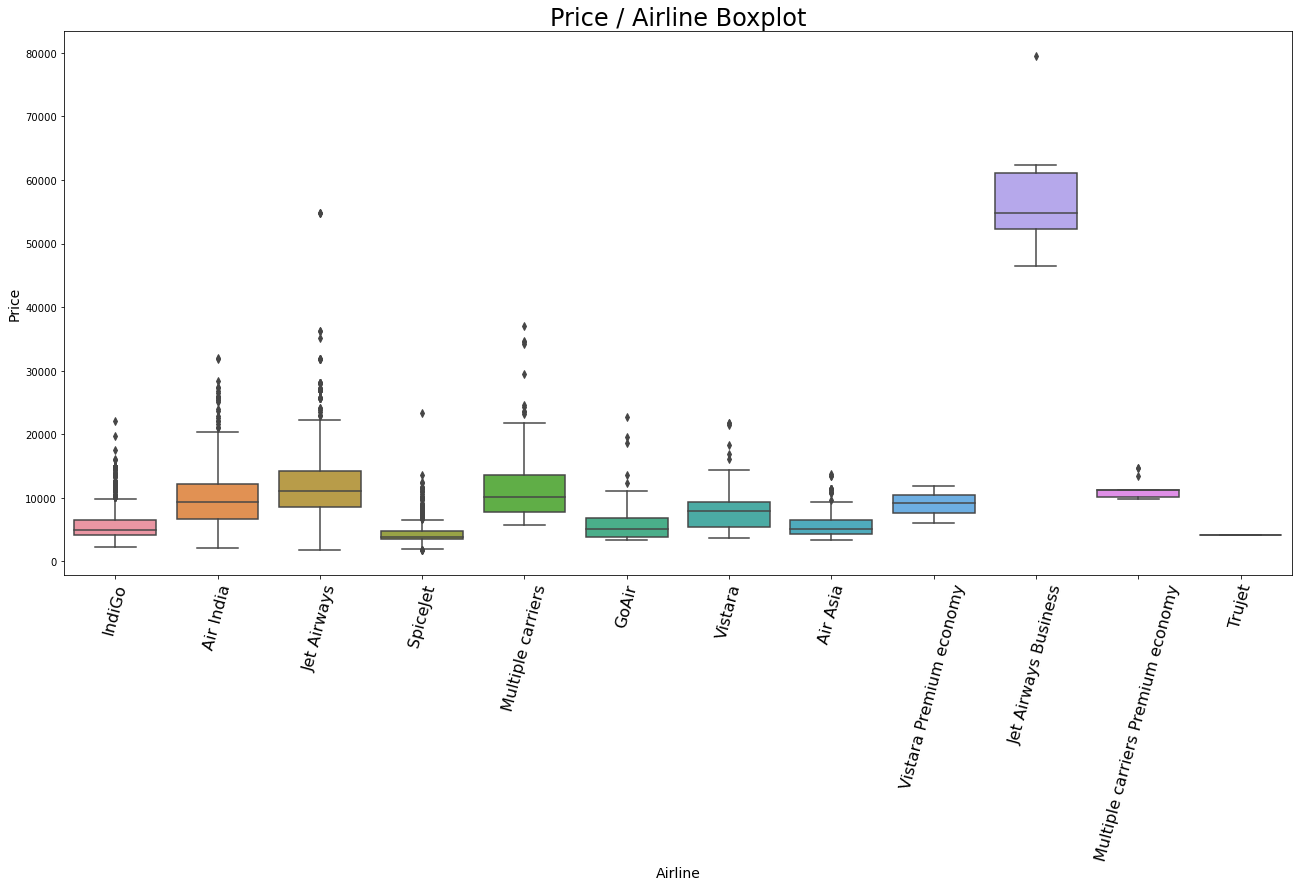

In [20]:
plt.figure(figsize=(22,10))
sns.boxplot(x=flights["Airline"], y=flights["Price"])
plt.title("Price / Airline Boxplot", size=24)
plt.xlabel("Airline", size=14)
plt.ylabel("Price", size=14)
plt.xticks(rotation=75, size=16)
plt.show()

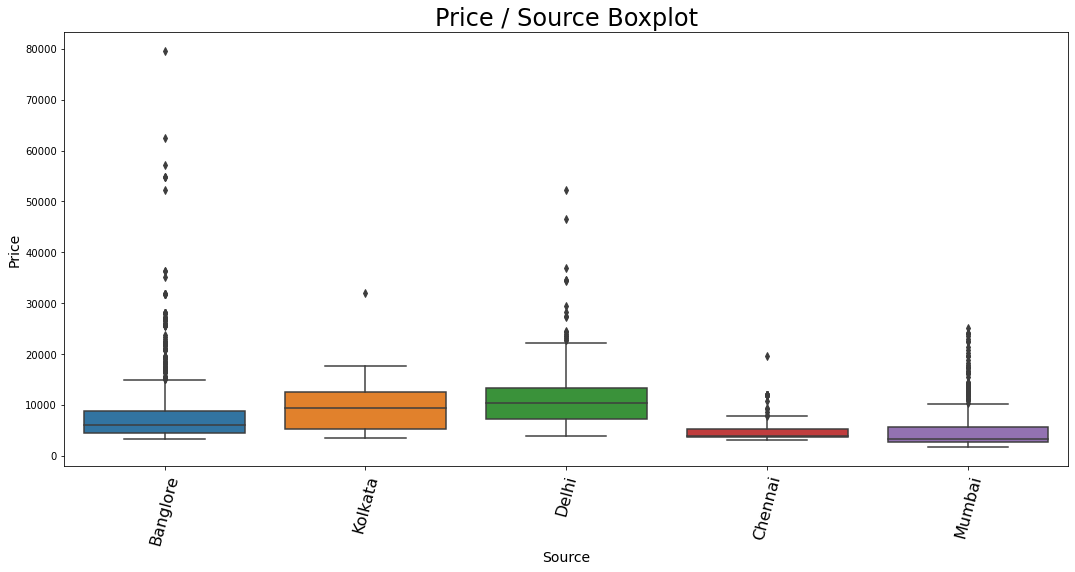

In [21]:
plt.figure(figsize=(18,8))
sns.boxplot(x=flights["Source"], y=flights["Price"])
plt.title("Price / Source Boxplot", size=24)
plt.xlabel("Source", size=14)
plt.ylabel("Price", size=14)
plt.xticks(rotation=75, size=16)
plt.show()

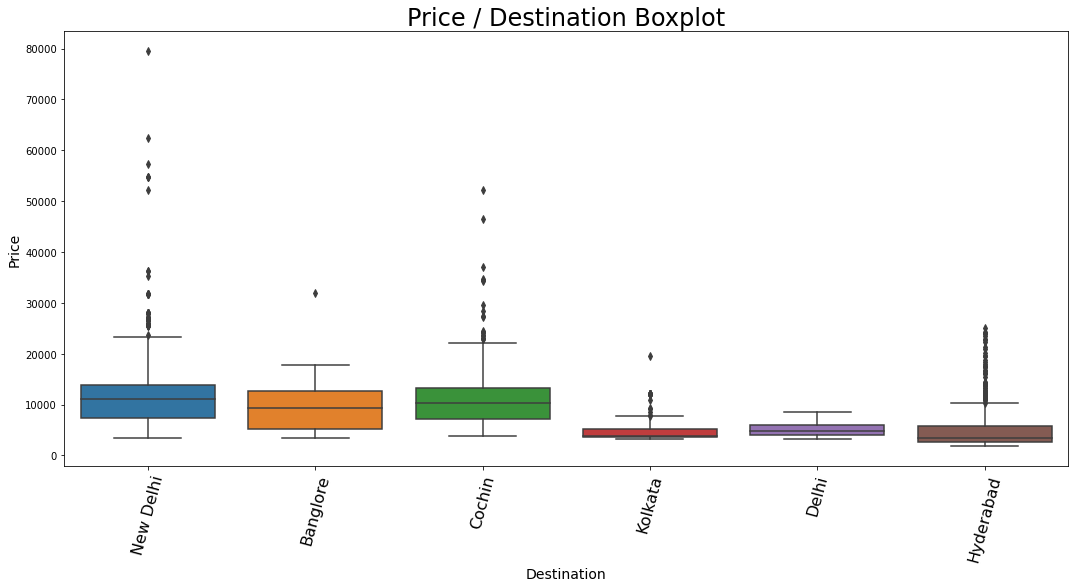

In [22]:
plt.figure(figsize=(18,8))
sns.boxplot(x=flights["Destination"], y=flights["Price"])
plt.title("Price / Destination Boxplot", size=24)
plt.xlabel("Destination", size=14)
plt.ylabel("Price", size=14)
plt.xticks(rotation=75, size=16)
plt.show()

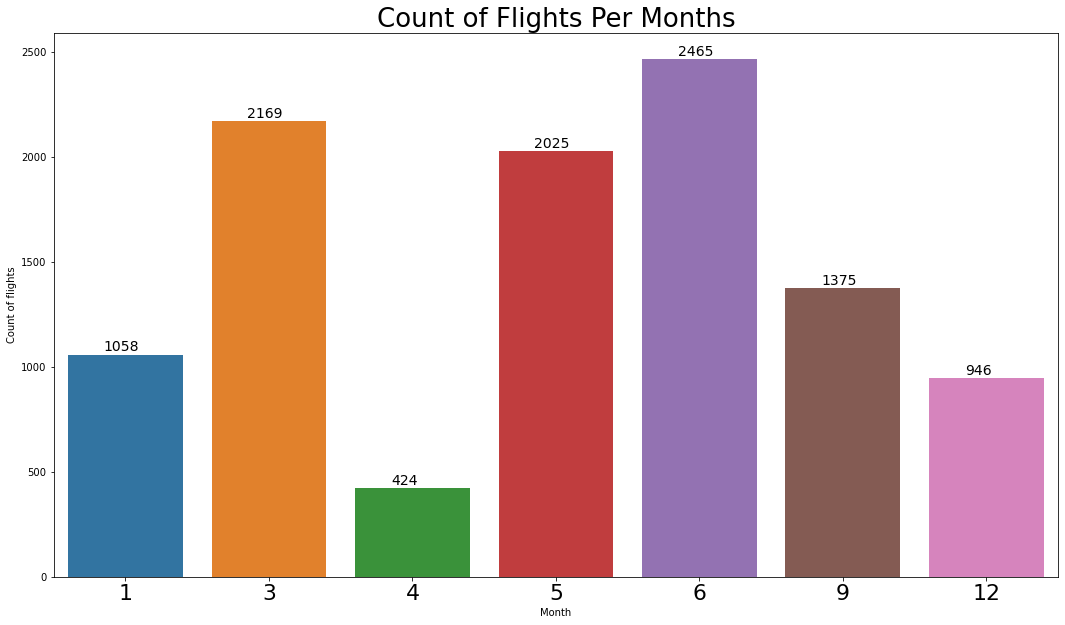

In [23]:
plt.figure(figsize = (18, 10))
plt.title('Count of Flights Per Months', size = 26)
ax=sns.countplot(x = 'journey_month', 
                 data = flights)
plt.xlabel('Month')
plt.ylabel('Count of flights')
plt.xticks(size = 22)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black', size = 14)

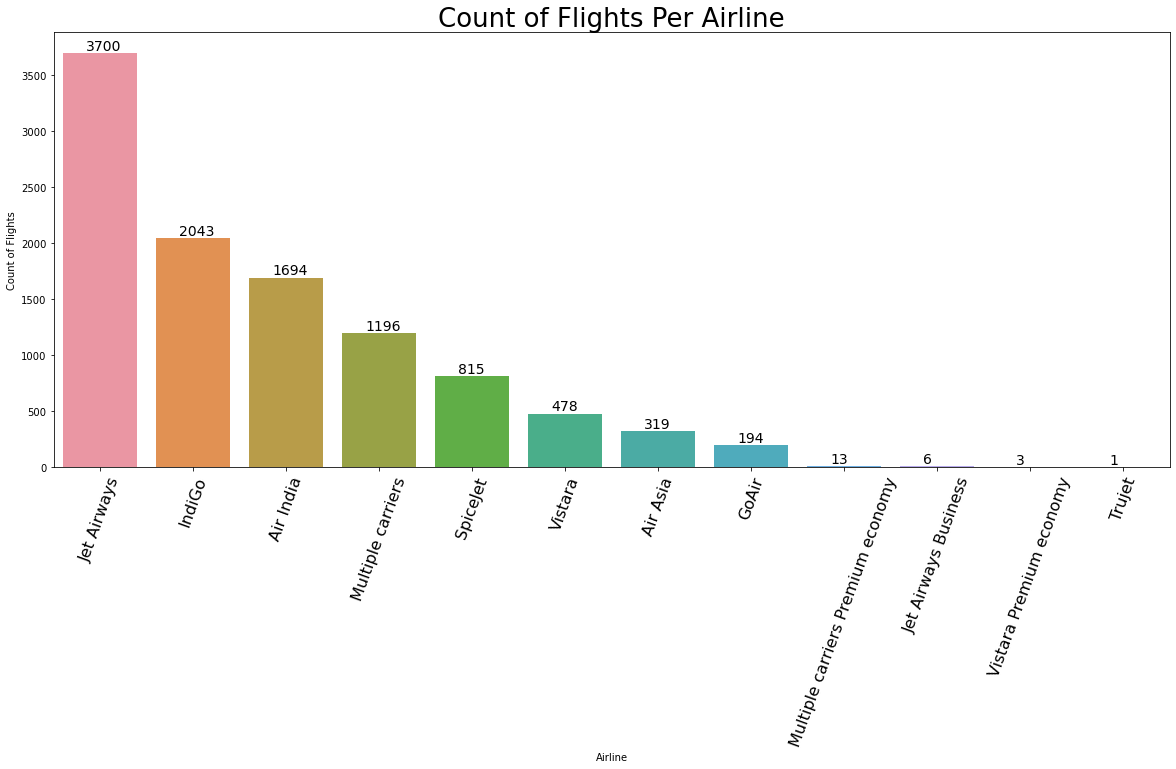

In [24]:
plt.figure(figsize = (20,8))
plt.title('Count of Flights Per Airline', size = 26)
ax=sns.countplot(x = 'Airline', 
                 data =flights, 
                 order = flights['Airline'].value_counts().index)
plt.xlabel('Airline')
plt.ylabel('Count of Flights')
plt.xticks(rotation = 70, size = 16)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black', size = 14)

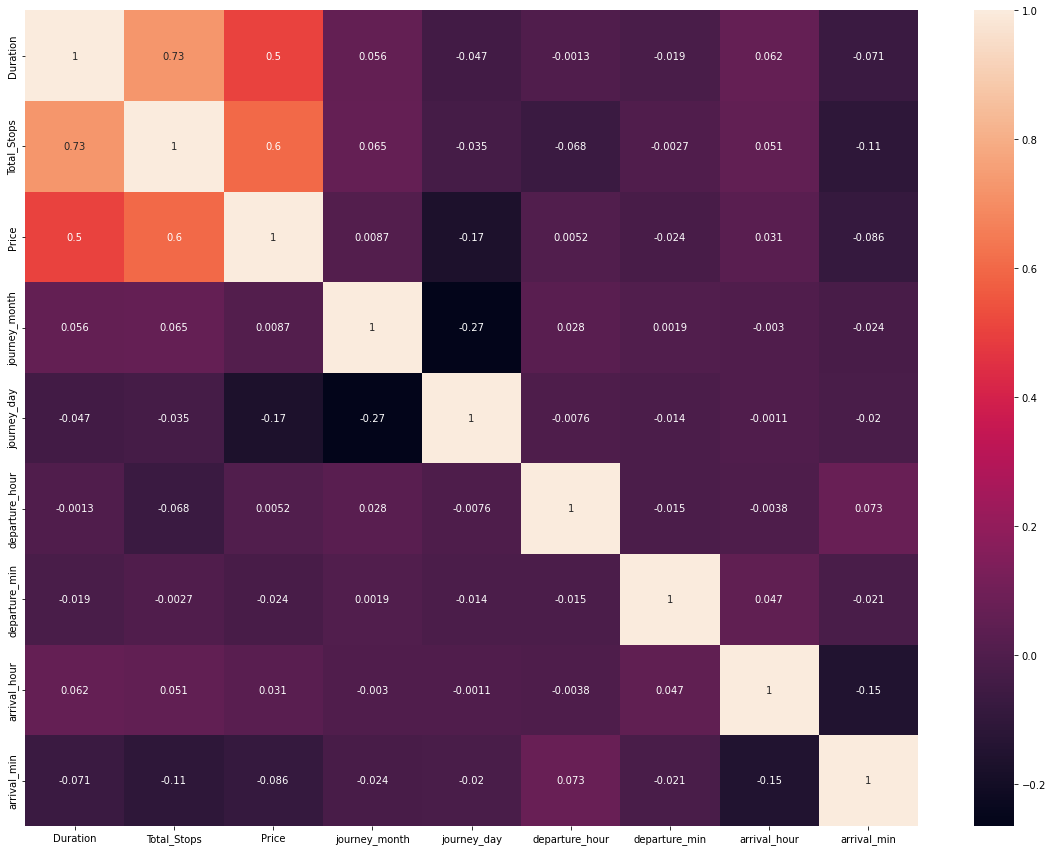

In [25]:
plt.figure(figsize=(20, 15))
sns.heatmap(flights.corr(), annot=True)
plt.show()

## 6. Data Preparation

In [26]:
flights_cat = flights.select_dtypes(include=['object'])
flights_cat

,Airline,Source,Destination,Additional_Info
0,IndiGo,Banglore,New Delhi,No info
1,Air India,Kolkata,Banglore,No info
2,Jet Airways,Delhi,Cochin,No info
3,IndiGo,Kolkata,Banglore,No info
4,IndiGo,Banglore,New Delhi,No info
...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,No info
10679,Air India,Kolkata,Banglore,No info
10680,Jet Airways,Banglore,Delhi,No info
10681,Vistara,Banglore,New Delhi,No info


In [27]:
flights_cat = pd.get_dummies(flights_cat, drop_first=True)
flights_cat

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10679,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10680,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10681,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0


In [28]:
y = pd.DataFrame(flights["Price"]) 
X = pd.concat([flights, flights_cat], axis=1)
X.drop(["Airline", "Source", "Destination", "Additional_Info", "Price"], axis = 1, inplace=True)

In [29]:
X

,Duration,Total_Stops,journey_month,journey_day,departure_hour,departure_min,arrival_hour,arrival_min,Airline_Air India,Airline_GoAir,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,170,0,3,24,22,20,1,10,0,0,...,1,0,0,0,0,0,0,0,1,0
1,445,2,1,5,5,50,13,15,1,0,...,0,0,0,0,0,0,0,0,1,0
2,1140,2,9,6,9,25,4,25,0,0,...,0,0,0,0,0,0,0,0,1,0
3,325,1,12,5,18,5,23,30,0,0,...,0,0,0,0,0,0,0,0,1,0
4,285,1,1,3,16,50,21,35,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,150,0,9,4,19,55,22,25,0,0,...,0,0,0,0,0,0,0,0,1,0
10679,155,0,4,27,20,45,23,20,1,0,...,0,0,0,0,0,0,0,0,1,0
10680,180,0,4,27,8,20,11,20,0,0,...,0,0,0,0,0,0,0,0,1,0
10681,160,0,1,3,11,30,14,10,0,0,...,1,0,0,0,0,0,0,0,1,0


In [30]:
y

,Price
0,3897
1,7662
2,13882
3,6218
4,13302
...,...
10678,4107
10679,4145
10680,7229
10681,12648


In [31]:
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
X_train.shape

(8369, 37)

In [33]:
Y_train.shape

(8369, 1)

In [34]:
scaler_x = MinMaxScaler().fit(X_train) 
scaler_y = MinMaxScaler().fit(Y_train)

In [35]:
x_train_sc = scaler_x.transform(X_train)
x_test_sc = scaler_x.transform(x_test)

In [36]:
y_train_sc = scaler_y.transform(Y_train)
y_test_sc = scaler_y.transform(y_test)

## 7. Data Modeling

## 1. Linear Regression

In [37]:
lr_model = LinearRegression()
lr_model.fit(x_train_sc, y_train_sc)
y_pred_sc = lr_model.predict(x_test_sc)

In [38]:
y_test_inv = scaler_y.inverse_transform(y_test_sc.reshape(-1,1))
y_pred_inv = scaler_y.inverse_transform(y_pred_sc.reshape(-1,1))

actual_mae = mean_absolute_error(y_test_inv, y_pred_inv)
actual_rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

print('Linear Regression Actual MAE = ', int(actual_mae))
print('Linear Regression Actual RMSE = ', int(actual_rmse))

Linear Regression Actual MAE =  1788
Linear Regression Actual RMSE =  2681


In [39]:
y_test_inv

array([[17996.],
       [ 3873.],
       [ 4462.],
       ...,
       [11627.],
       [ 6795.],
       [13377.]])

In [40]:
y_pred_inv

array([[15952.69530487],
       [ 5129.6096344 ],
       [ 4407.67511749],
       ...,
       [10625.09144592],
       [11938.45465088],
       [12160.90776825]])

## 2. Random Forest Regressor

In [41]:
forest_model = RandomForestRegressor()
forest_model.fit(x_train_sc, y_train_sc.ravel())
y_pred_sc = forest_model.predict(x_test_sc)

In [42]:
y_test_inv = scaler_y.inverse_transform(y_test_sc.reshape(-1,1))
y_pred_inv = scaler_y.inverse_transform(y_pred_sc.reshape(-1,1))

actual_mae = mean_absolute_error(y_test_inv, y_pred_inv)
actual_rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

print('Random Forest Regressor Actual MAE = ', int(actual_mae))
print('Random Forest Regressor Actual RMSE = ', int(actual_rmse))

Random Forest Regressor Actual MAE =  660
Random Forest Regressor Actual RMSE =  1496


In [43]:
y_test_inv

array([[17996.],
       [ 3873.],
       [ 4462.],
       ...,
       [11627.],
       [ 6795.],
       [13377.]])

In [44]:
y_pred_inv

array([[15003.23  ],
       [ 3859.94  ],
       [ 4294.6   ],
       ...,
       [10404.1575],
       [ 7216.86  ],
       [13530.13  ]])

- The **Random Forest Regressor** performs better than the linear regression model